__9.1 (Rounding first base).__ <br>
The data in “rounding.txt” gives the times
required to round first base for 22 baseball players using three styles: rounding
out, a narrow angle and a wide angle.1 The goal is to determine if the method
of rounding first base has a significant effect on times to round first base. <br><br>
The data and the format of the data can be viewed using a text editor or
a spreadsheet. With the data file in the current working directory, input the
data using <br>
```
rounding = read.table("rounding.txt", header=TRUE)
```
Check using the str function that the data is in stacked format with three
variables: time, method, player, where time is numeric and method and
player are factors.<br>
Analyze the data assuming a randomized block design with time to round
first base as the response, method of rounding first as the treatment, and
player as the block variable. Plot residuals to check whether the assumptions
for the distribution of random error appear to be valid.

In [21]:
rounding = read.table("rounding.txt", header=TRUE)

rounding = data.frame(rounding$times, factor(rounding$method), factor(rounding$block)  )
names(rounding) = c("times", "method", "block")


In [22]:
L = aov(times ~ method + block, data = rounding)
summary(L)

            Df Sum Sq Mean Sq F value  Pr(>F)    
method       2  0.094 0.04686   6.288 0.00408 ** 
block       21  4.219 0.20089  26.960 < 2e-16 ***
Residuals   42  0.313 0.00745                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [24]:
model.tables(L, cterms="method")

Tables of effects

 method 
method
NarrowAngle    RoundOut   WideAngle 
    0.02197     0.03106    -0.05303 

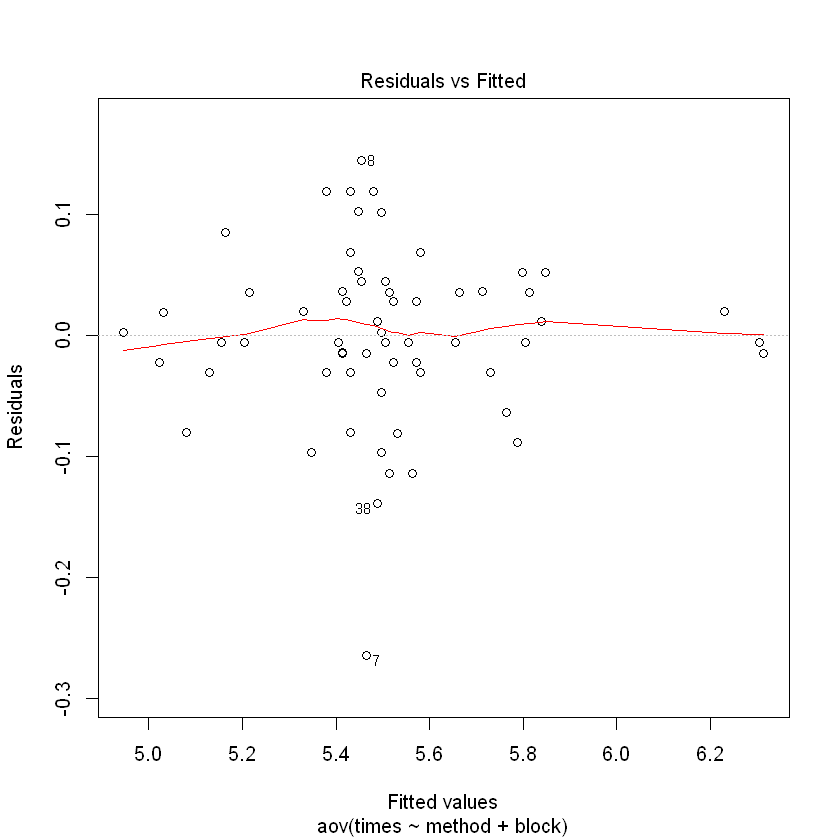

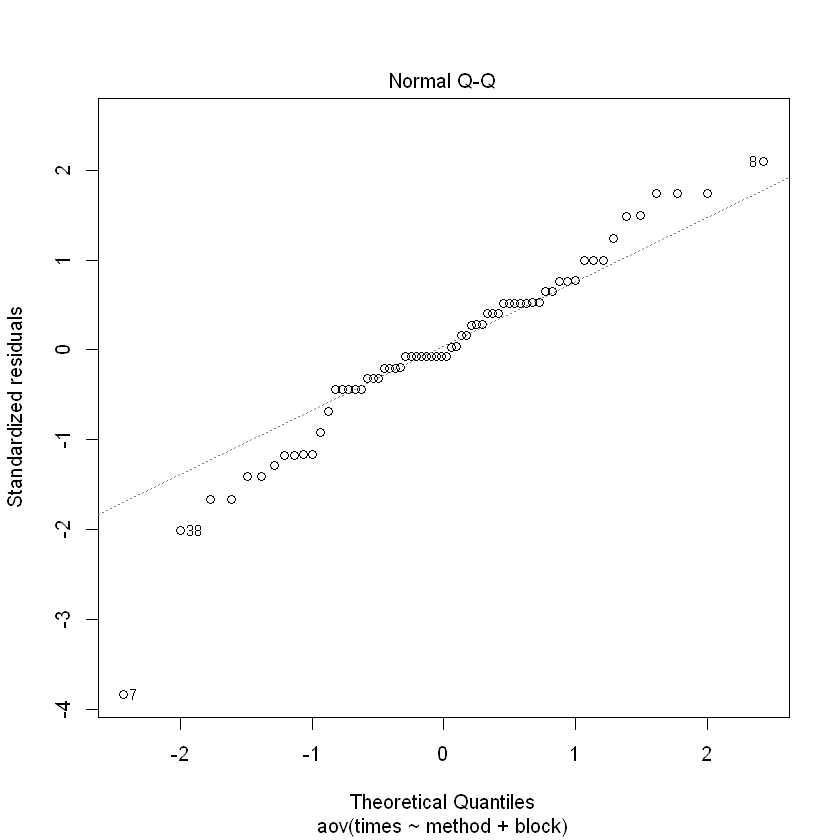

In [25]:
plot(L, which=1:2)

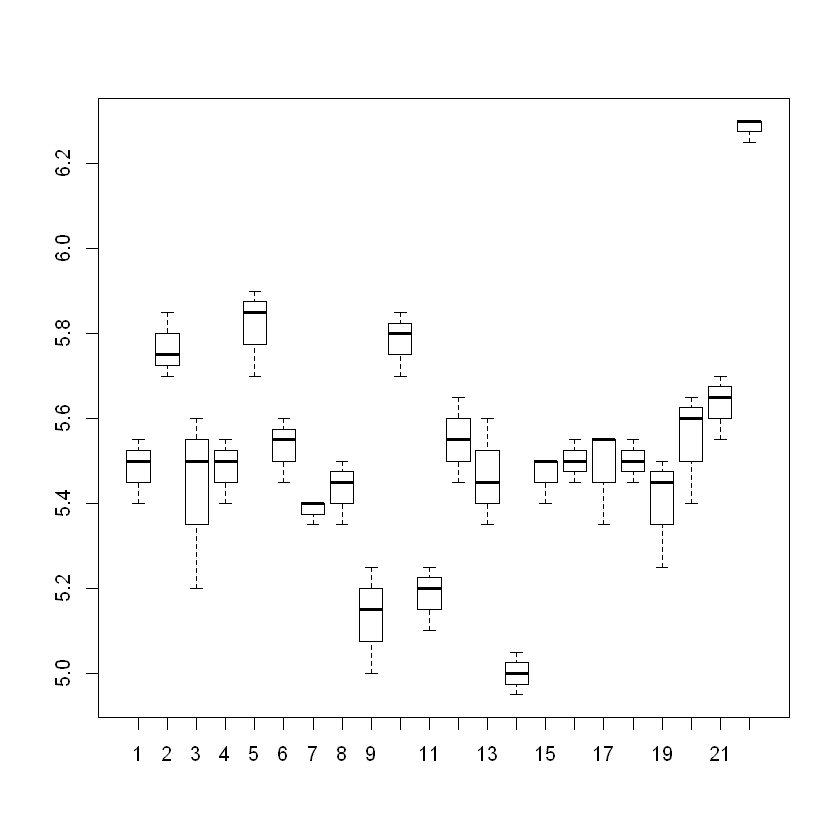

In [26]:
boxplot(times ~ block, data = rounding)

__9.2 (Speed of light).__ <br>The morley data in R contains the classical data
of Michaelson and Morley on the speed of light, recording five experiments
of 20 consecutive runs each. The response is the speed of light measurement Speed. The experiment is Expt and the run is Run. See the documentation (?morley) and also http://lib.stat.cmu.edu/DASL/Stories/
SpeedofLight.html for more details about the experiments and the data
set. <br> <br>
Use the str function to check that there are 100 observations of the response Speed, Expt, and Run; all integer variables. Convert Expt and Run to 
factors using <br>
```
morley$Expt = factor(morley$Expt)
morley$Run = factor(morley$Run)
```
Display a boxplot of Speed by Expt. Speed of light is a constant, so we see
there are some problems because the measurements of speed do not seem to
be consistent across the five experiments. <br>
The data can be viewed as a randomized block experiment. What is the
null hypothesis of interest? Analyze the data and residuals and summarize
your conclusions.

            Df Sum Sq Mean Sq F value  Pr(>F)   
Expt         4  94514   23629   4.288 0.00311 **
Residuals   95 523510    5511                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

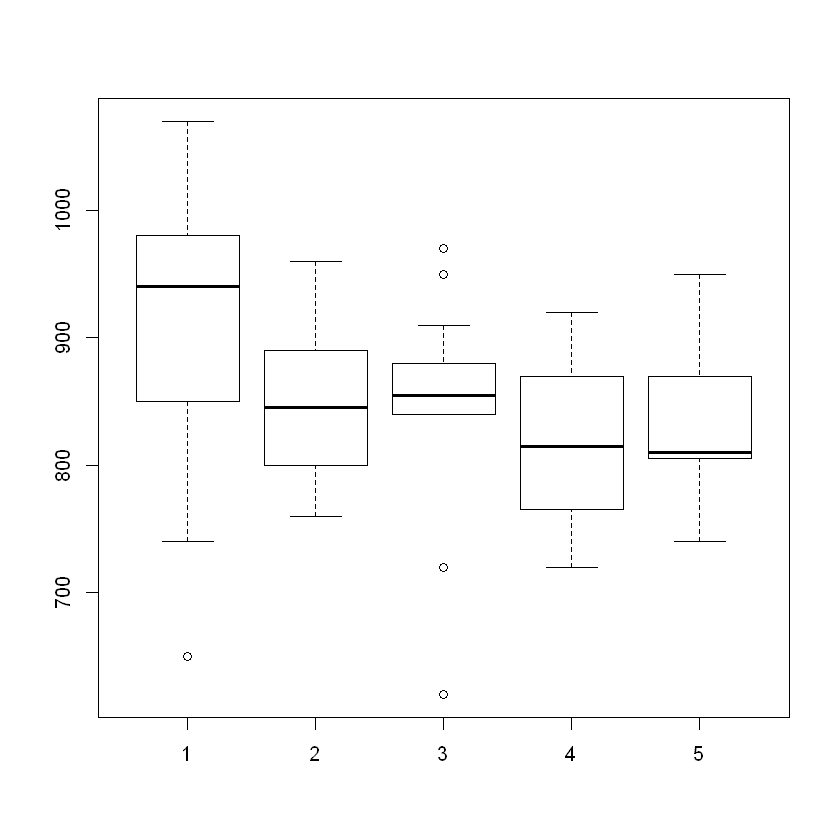

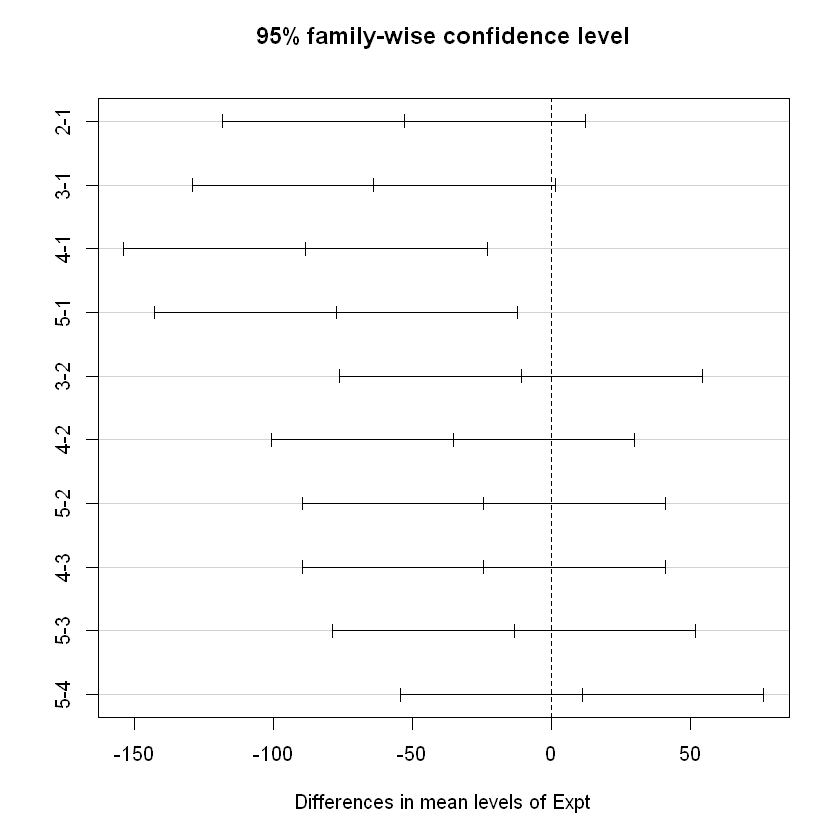

In [38]:
morley$Expt = factor(morley$Expt)
morley$Run = factor(morley$Run)
boxplot(Speed ~ Expt, data = morley)
L = aov(Speed ~ Expt, data = morley)
summary(L)
CIs = TukeyHSD(L, which=1)
plot(CIs)


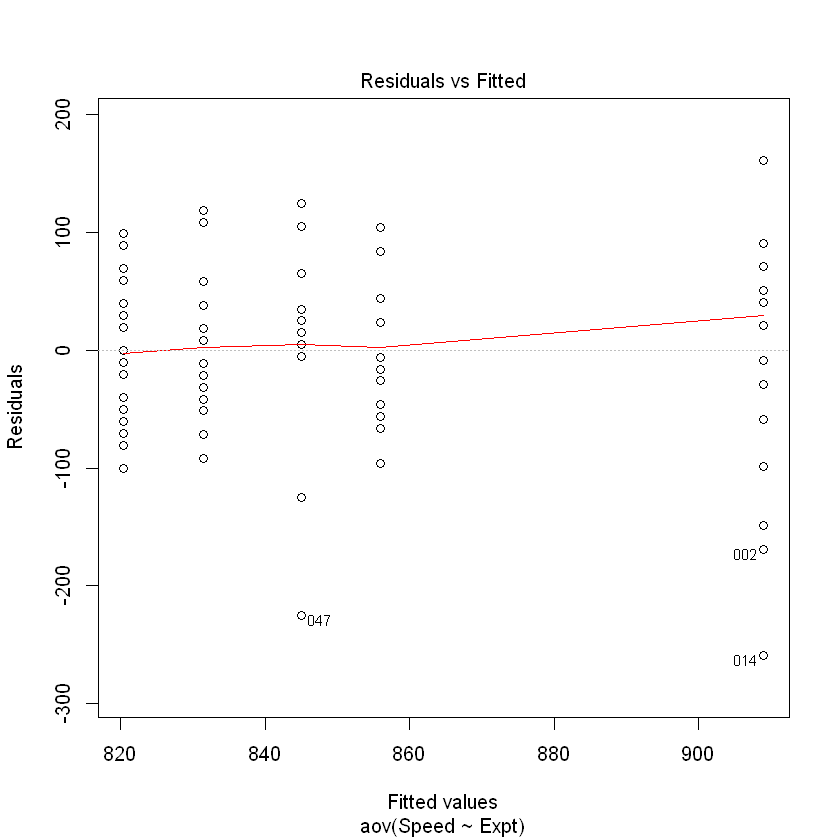

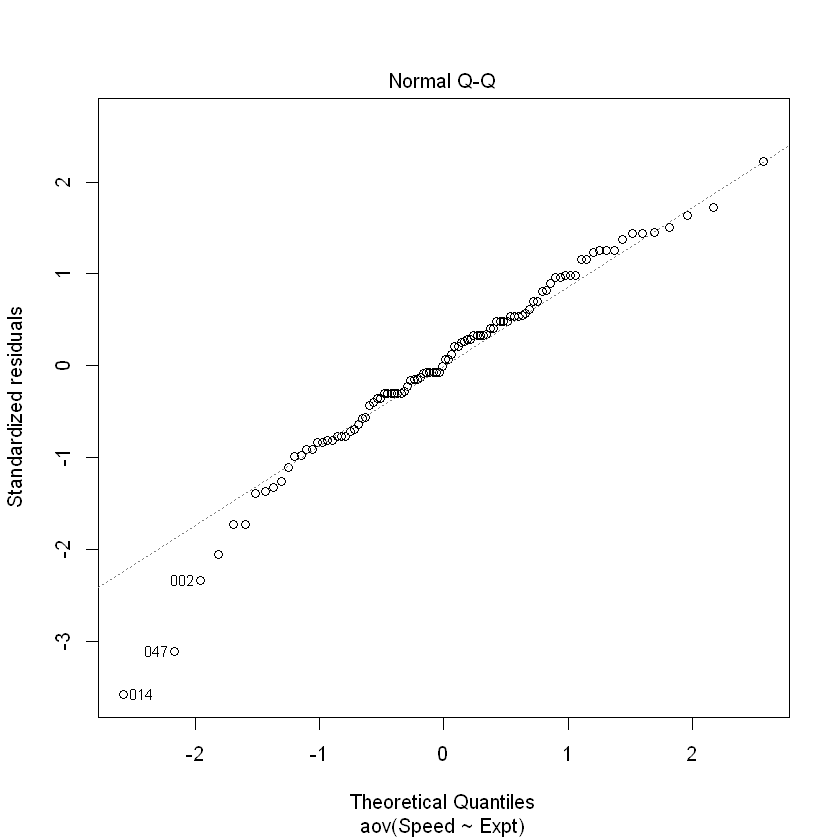

In [39]:
plot(L, which = 1:2)

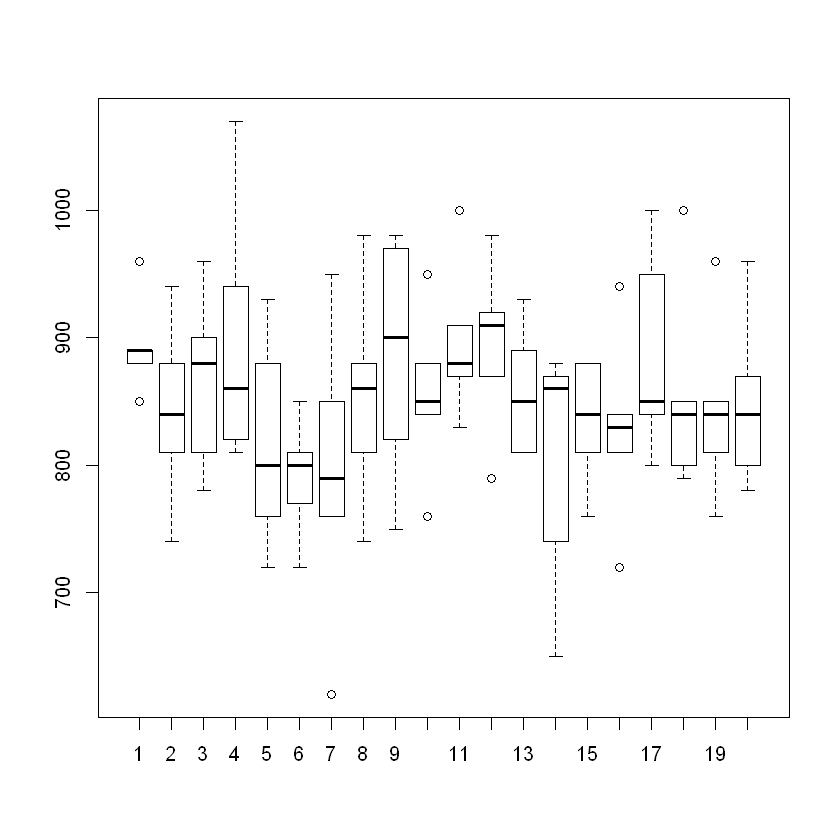

In [40]:
boxplot(Speed ~ Run, data = morley)
